# Compressing Images

In [34]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from opencv_camera import bgr2gray, rgb2bgr, rgb2gray

In [51]:
class Compressor:
    _format = ".png"
    
    @property
    def format(self):
        return self._format
    
    @format.setter
    def format(self, fmt):
        if fmt not in [".jpg", "jpg", ".png", "png"]:
            raise ValueError("Invalid format: {fmt}")
        if fmt.find(".") != 0:
            fmt = "." + fmt
        self._format = fmt
    
    def compress(self, img):
        ok, cb = cv2.imencode(self._format, img)
        if ok:
            cb = cb.tobytes()
        else:
            cb = None
        return cb
    
    def uncompress(self, img_bytes, shape):
        img = np.frombuffer(img_bytes, dtype=np.uint8)

        if len(shape) == 3:
            img = cv2.imdecode(img, cv2.IMREAD_COLOR)
        else:
            img = cv2.imdecode(img, cv2.IMREAD_GRAYSCALE)

        img = img.reshape(shape)
        return img

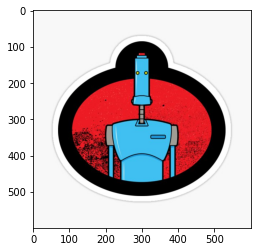

In [32]:
im = cv2.imread("helper.jpg") # bgr
im = rgb2bgr(im)
plt.imshow(im);

>> Compressed bytes: 57693


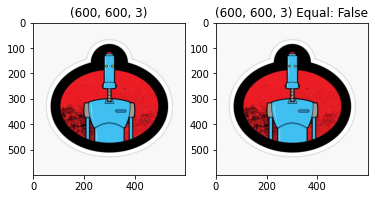

In [62]:
shape = im.shape
set_format = "jpg"

c = Compressor()
c.format = set_format
cimg = c.compress(im)
print(f">> Compressed bytes: {len(cimg)}")

uimg = c.uncompress(cimg,shape)

plt.subplot(1,2,1)
plt.imshow(im)
plt.title(f"{im.shape}")
plt.subplot(1,2,2)
plt.imshow(uimg)
plt.title(f"{uimg.shape} Equal: {np.array_equal(im, uimg)}");

>> Compressed bytes: 48005


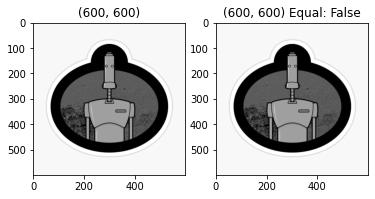

In [63]:
gray = rgb2gray(im)
shape = gray.shape

c = Compressor()
c.format = set_format
cimg = c.compress(gray)
print(f">> Compressed bytes: {len(cimg)}")

uimg = c.uncompress(cimg,shape)

plt.subplot(1,2,1)
plt.imshow(gray, cmap="gray")
plt.title(f"{gray.shape}")
plt.subplot(1,2,2)
plt.imshow(uimg, cmap="gray")
plt.title(f"{uimg.shape} Equal: {np.array_equal(gray, uimg)}");